# pH of rainwater

In [12]:
% input constants
KH=10^-1.5; Ka1=10^-6.3; Ka2=10^-10.3; PCO2=10^-3.5; Kw=10^-14;

# equations

$[H_2CO_3]=K_H*P_{CO_2}$

$[HCO_3^-]=\dfrac{K_H*P_{CO_2}*K_{a1}}{[H^+]}$

$[CO_3^{2-}] = \dfrac{2*K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}$

$[OH^-] = \dfrac{K_w}{[H^+]}$

$[H^+]=[HCO_3]+2*[CO_3^{2-}]+[OH^-]$

$[H^+]=\dfrac{K_H*P_{CO_2}*K_{a1}}{[H^+]}+\dfrac{2*K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}+\dfrac{K_w}{[H^+]}$

expand the polynomial

$[H^+]^3-(K_{a1}K_HP_{CO2}-K_w)[H^+]^2-K_{a1}K_{a2}P_{CO2}K_H = 0$

this is a third order polynomial.  Solve using root finding.  Just take the positive real root as the answer for what the $[H^+]$ is.



In [13]:
% solve the cubic equation

a=1;
b=0;
c=-Ka1*KH*PCO2-Kw;
d=-Ka1*Ka2*PCO2*KH;

t=roots([a b c d]);
t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root
t=t(t>0);
pH=-log10(t);

% assuming it is just HCO3 that equals H (simplifying assumptions)

pHsimple=-log10(sqrt(KH*PCO2*Ka1)); pHsimplestr=num2str(pHsimple);

In [14]:
pHstr=num2str(pH); text=['The pH is ',pHstr,' the simplifiying assumpsion yields pH of ',pHsimplestr]; disp(text)

The pH is 5.6496 the simplifiying assumpsion yields pH of 5.65


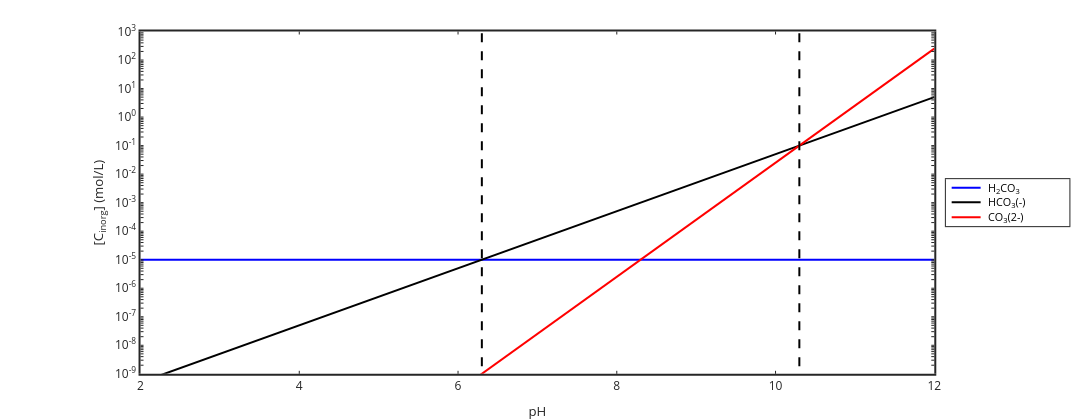

In [15]:
% to graph versus pH

graphics_toolkit ("plotly");
%graphics_toolkit ("notebook");

pH=2:0.1:12; H=10.^-pH; HCO3=(Ka1*KH*PCO2)./H;  CO3=(Ka2*Ka1*KH*PCO2)./(H.^2); 
H2CO3=ones(size(pH)).*(KH*PCO2);

h1=semilogy(pH,H2CO3,'b-','linewidth',2);
hold on
h2=semilogy(pH,HCO3,'k-','linewidth',2);
h3=semilogy(pH,CO3,'r-','linewidth',2);
xlabel('pH'); ylabel('[C_{inorg}] (mol/L)')
legend('H_2CO_3','HCO_3(-)','CO_3(2-)','location','eastoutside')
legend ("autoupdate", "off");
set(gca,'linewidth',2,'fontsize',12)

semilogy([-log10(Ka1) -log10(Ka1)],[1e-10 1e3],'k--','linewidth',2)
semilogy([-log10(Ka2) -log10(Ka2)],[1e-10 1e3],'k--','linewidth',2)

axis([2 12 1e-9 1e3])

# Observations

Notice that 

1. the protonated and deprotonated species are equal at the pKa.  [H2CO3]=[HCO3] at pH 6.3, and [HCO3]=[CO3] at pH 10.3
2. the slope of the HCO3 line is 1 (one proton loss)
3. the slope of the CO3 line is 2 (two protons loss)
4. the most protonated species occur at the lowest pH, and the most deprotonated at the highest pH
5. total carbon goes up dramatically at higher pHs.  That is why we needed a log scale to display all the data in a way we could read it.

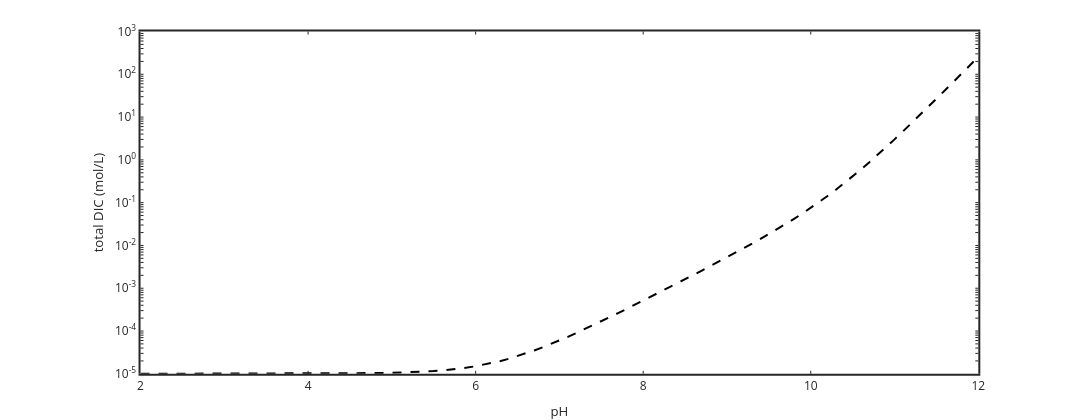

In [16]:
CT=H2CO3+HCO3+CO3;

semilogy(pH,CT,'k--','linewidth',2)
xlabel('pH'); ylabel('total DIC (mol/L)')
set(gca,'linewidth',2,'fontsize',12)
set(gca,'linewidth',2,'fontsize',12)